Golden Ratio Notebook

Tutor:
* Anthropic's AI Claude

This model now has the golden ratio playing a much more active role in price movements. The price will tend to be attracted to golden ratio levels, experience increased volatility near these levels, and potentially show breakout behavior when moving significantly beyond a level.

It's important to note that this is a highly speculative model. In real markets, while some traders do use golden ratio-based levels, their influence is not as direct or consistent as modeled here. This model is meant more as an exploration of the concept rather than a realistic market simulation.

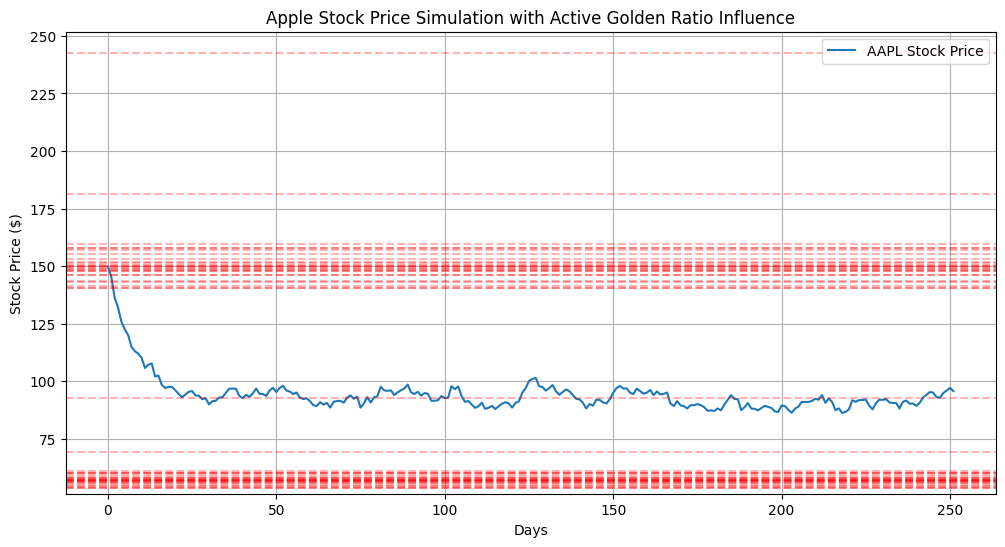

Initial Price: $150.00
Final Price: $95.77
Highest Price: $150.00
Lowest Price: $86.31
Number of golden ratio levels generated: 26


In [6]:
"""
Abstract:
This script models the movements of Apple stock with an active incorporation of the golden ratio (φ ≈ 1.618).
It generates synthetic stock data based on geometric Brownian motion, but modifies this with effects based on
golden ratio levels. The model includes attraction to golden ratio levels, increased volatility near these levels,
and potential breakout effects. The script produces both numerical data and a graphical representation of the
simulated stock movements.

Note: This is a speculative model for educational purposes and should not be used for actual trading decisions.
Real stock movements are influenced by many complex factors not accounted for in this simulation.
"""

import numpy as np
import matplotlib.pyplot as plt

# Constants
TRADING_DAYS = 252  # Average number of trading days in a year
INITIAL_PRICE = 150  # Starting price for AAPL
BASE_VOLATILITY = 0.2  # Base annual volatility (20%)
GOLDEN_RATIO = (1 + 5 ** 0.5) / 2  # φ ≈ 1.618

# Parameters for golden ratio effects
ATTRACTION_STRENGTH = 0.1  # Strength of attraction to golden ratio levels
VOLATILITY_INCREASE = 0.5  # Increase in volatility near golden ratio levels
BREAKOUT_THRESHOLD = 0.05  # Threshold for breakout effect (5% beyond level)
BREAKOUT_MOMENTUM = 0.01  # Strength of breakout momentum

def calculate_golden_ratio_levels(price):
    """Calculate golden ratio levels based on a given price."""
    return price / GOLDEN_RATIO, price * GOLDEN_RATIO

def find_nearest_level(price, levels):
    """Find the nearest golden ratio level to the current price."""
    flattened_levels = [level for pair in levels for level in pair]
    return min(flattened_levels, key=lambda x: abs(x - price))

def golden_ratio_effect(price, levels):
    """Calculate the effect of golden ratio levels on price movement."""
    nearest_level = find_nearest_level(price, levels)
    distance = nearest_level - price

    # Attraction effect
    attraction = ATTRACTION_STRENGTH * distance / price

    # Breakout effect
    breakout = 0
    if abs(distance / price) > BREAKOUT_THRESHOLD:
        breakout = BREAKOUT_MOMENTUM * np.sign(distance)

    return attraction + breakout

def adjust_volatility(price, levels):
    """Adjust volatility based on proximity to golden ratio levels."""
    nearest_level = find_nearest_level(price, levels)
    distance_ratio = abs((nearest_level - price) / price)
    volatility_multiplier = 1 + VOLATILITY_INCREASE * (1 - min(distance_ratio, 1))
    return BASE_VOLATILITY * volatility_multiplier

def generate_stock_prices(initial_price, days):
    """Generate stock prices with golden ratio effects."""
    prices = [initial_price]
    levels = [calculate_golden_ratio_levels(initial_price)]

    for _ in range(days - 1):
        current_price = prices[-1]
        volatility = adjust_volatility(current_price, levels)
        daily_volatility = volatility / np.sqrt(TRADING_DAYS)

        # Generate random return
        random_return = np.random.normal(0, daily_volatility)

        # Apply golden ratio effect
        ratio_effect = golden_ratio_effect(current_price, levels)

        # Calculate new price
        new_price = current_price * np.exp(random_return + ratio_effect)

        prices.append(new_price)

        # Occasionally update levels (e.g., every 10 days)
        if len(prices) % 10 == 0:
            levels.append(calculate_golden_ratio_levels(new_price))

    return np.array(prices), levels

def plot_stock_model(prices, levels):
    """Plot the simulated stock prices and golden ratio levels."""
    plt.figure(figsize=(12, 6))
    plt.plot(prices, label='AAPL Stock Price')

    for i, level_pair in enumerate(levels):
        for level in level_pair:
            plt.axhline(y=level, color='r', linestyle='--', alpha=0.3)

    plt.title('Apple Stock Price Simulation with Active Golden Ratio Influence')
    plt.xlabel('Days')
    plt.ylabel('Stock Price ($)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Run simulation
SIMULATION_DAYS = 252  # Simulate for a year
prices, levels = generate_stock_prices(INITIAL_PRICE, SIMULATION_DAYS)

# Plot results
plot_stock_model(prices, levels)

# Print some statistics
print(f"Initial Price: ${INITIAL_PRICE:.2f}")
print(f"Final Price: ${prices[-1]:.2f}")
print(f"Highest Price: ${np.max(prices):.2f}")
print(f"Lowest Price: ${np.min(prices):.2f}")
print(f"Number of golden ratio levels generated: {len(levels)}")